In [94]:
import random
import numpy as np
import math
import sympy
import matplotlib.pyplot as plt
import operator

In [95]:
def square_or_not(x):
    root=math.sqrt(x)
    if int(root+0.5)**2==x:
        return x

In [96]:
#representations of priors as lists.
h=list(range(1,101))
#H1
h1=[i for i in h if i%2==0]
#H2
h2=[i for i in h if i%2!=0]
#H3
h3=[]
for i in h:
    h3.append(square_or_not(i))
h3=[x for x in h3 if x is not None]
#H4
h4=[]
h4=list(sympy.sieve.primerange(1, 101))
#H5
h5=[i for i in h if i%5==0]
#H6
h6=[i for i in h if i%10==0]
all_h=[h1,h2,h3,h4,h5,h6]


In [97]:
#1 [5pts]: Write a function that takes an argument x, a hypothesis (however you represent it) and
#computes a size principle likelihood (e.g. where the likelihood of each number in the set is equal).
#Write down what likelihood each hypothesis assigns to each data point in it. What does each hypothesis
#assign to data points not in it?
def likelihood(x,h):
    if set(x).issubset(set(h)):
        n=sum(np.isin(x,h))
        likelihood=(1/len(h))**n
        return likelihood
    else:
        return 0
#for datapoints not in the hypothesis the likelihood is assigned to zero

In [98]:
#write a posterior function
def posterior(x,h):# here h is a list of priors(list of list)
    valid_hypo=0
    post=[]
    for i in h:#(i is one of the priors) count total effective priors
        if set(x).issubset(set(i)):
            valid_hypo+=1
    if not valid_hypo==0:
        valid_prior=1/valid_hypo
    else:
        valid_prior=0
    for j in h:
            post.append(likelihood(x,j)*valid_prior)
    return post

In [99]:
#2.Write a sentence for each plot about whether the model does or does not capture your intuitions about the “right” answer.
x_axis=[1,2,3,4,5,6]
bars=['even','odd','square','prime','multiple of 5','multiple of 10']
x1=[]
y1=posterior(x1,all_h)

x2=[50]
y2=posterior(x2,all_h)

x3=[53]
y3=posterior(x3,all_h)

x4=[50,53]
y4=posterior(x4,all_h)

x5=[16]
y5=posterior(x5,all_h)

x6=[10,20]
y6=posterior(x6,all_h)

x7=[2,4,8]
y7=posterior(x7,all_h)

x8=[2,4,8,10]
y8=posterior(x8,all_h)

posterior_sum=y1+y2+y3+y4+y5+y6

In [100]:
#normalization needed before plotting
y1=[i/sum(y1) for i in y1]
y2=[i/sum(y2) for i in y2]
y3=[i/sum(y3) for i in y3]
y5=[i/sum(y5) for i in y5]
y6=[i/sum(y6) for i in y6]
y7=[i/sum(y7) for i in y7]
y8=[i/sum(y8) for i in y8]

<function matplotlib.pyplot.show(*args, **kw)>

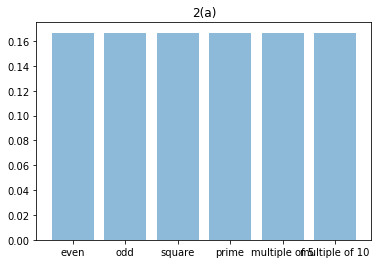

In [101]:
#2(a)
plt.bar(x_axis, y1, align='center', alpha=0.5)
plt.xticks(x_axis,bars)
plt.title('2(a)')
plt.show
#with no data, there is no information indicating which hypothesis it comes from, so it could be any hypothesis. 

<function matplotlib.pyplot.show(*args, **kw)>

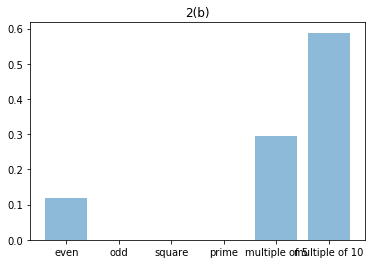

In [102]:
#2(b)
plt.bar(x_axis, y2, align='center', alpha=0.5)
plt.xticks(x_axis,bars)
plt.title('2(b)')
plt.show
#50 is give, it cannot be odd number, it cannot be prime, the other posteriors are reasonble too. 

<function matplotlib.pyplot.show(*args, **kw)>

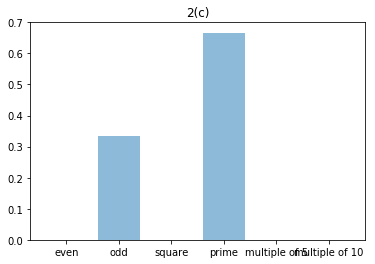

In [103]:
#2(c)
plt.bar(x_axis, y3, align='center', alpha=0.5)
plt.xticks(x_axis,bars)
plt.title('2(c)')
plt.show
#with 53 give, it cannot be even number ,it cannot be square etc, other posteriors are reasonable as well. 

<function matplotlib.pyplot.show(*args, **kw)>

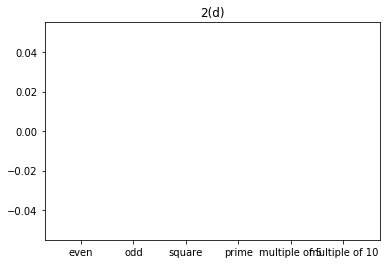

In [104]:
#2(d)
plt.bar(x_axis, y4, align='center', alpha=0.5)
plt.xticks(x_axis,bars)
plt.title('2(d)')
plt.show
#with 50,53 given, it cannot be odd ,cannot be even, cannot be square, cannot be prime ,and the rest of the two hypothesis are impossible either. thus 
#it is reasonable to say that it deos not come from any of the hypothesis. 

<function matplotlib.pyplot.show(*args, **kw)>

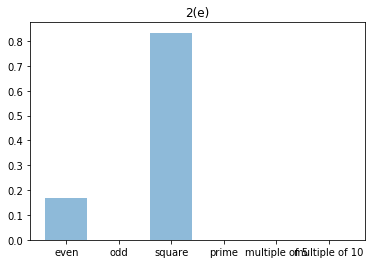

In [105]:
#2(e)
plt.bar(x_axis, y5, align='center', alpha=0.5)
plt.xticks(x_axis,bars)
plt.title('2(e)')
plt.show
#with 16 give, it cannot be odd, cannot be prime, cannot be multiples of 5 or 10, other posteriors are reasonable. 

<function matplotlib.pyplot.show(*args, **kw)>

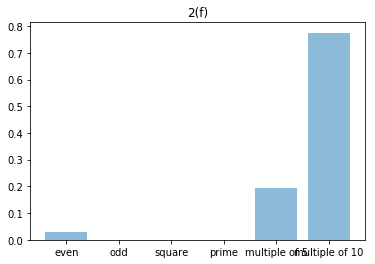

In [106]:
#2(f)
plt.bar(x_axis, y6, align='center', alpha=0.5)
plt.xticks(x_axis,bars)
plt.title('2(f)')
plt.show
#with 10,20 give, it cannot be odd ,cannot be square,cannot be prime, multiples of 10 has a higher chance over multiples of 5 
#also makes sense. 

<function matplotlib.pyplot.show(*args, **kw)>

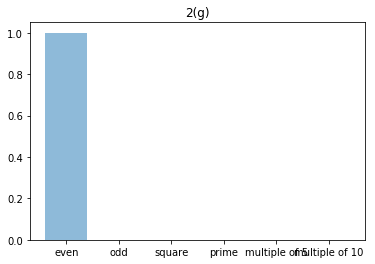

In [107]:
#2(g)
plt.bar(x_axis, y7, align='center', alpha=0.5)
plt.xticks(x_axis,bars)
plt.title('2(g)')
plt.show
#with 2,4,8 given, all the other hypothesis are impossible, only possible one are even number hypothsis so it has a probability of 1 after normalization. 

<function matplotlib.pyplot.show(*args, **kw)>

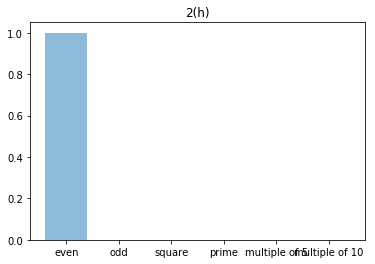

In [108]:
#2(h)
plt.bar(x_axis, y8, align='center', alpha=0.5)
plt.xticks(x_axis,bars)
plt.title('2(h)')
plt.show
#with 2,4,8,10 given, all the other hypothesis are impossible, only possible one are even number hypothsis so it has a probability of 1 after normalization. 

In [109]:
#3. range-based hypothesis question
#create range hypothesis
range_hypothesis=[]
count=0
for i in range(1,101):
    for j in range(i+2,102):
        range_hypothesis.append(range(i,j))
        count+=1

In [115]:
#3(a)
y1=posterior(x1,all_h_withrange)
index=list(np.argsort(y1)[-10:])
#corresponding hypothesis
max_hypothesis_forx1=[all_h_withrange[i] for i in index]
#max 10 values to plot
max_10_y1=[y1[i] for i in index]
#top 10 ranges
max_hypothesis_forx1
plt.bar(range(10), max_10_y1,align='center', alpha=0.5)
plt.xticks(range(10),max_hypothesis_forx1)
plt.title('3(b)')
plt.show
#In theory , with range based hypothesis, it would match our intution more accurately because we consider both range and possible distribution the data 
#might come from. However, I know that I did not incorrecly cause the range based hypothesis should have a sum of 1/7 probability, 
# but i give all hypothesis equal probability here. if we consider the range based hypothesis have a sum of 1/7 probability,  the top 10 possible hypotehsis
#shoudl make more sense. 

In [111]:
#3(b)
y2=posterior(x2,all_h_withrange)
index=list(np.argsort(y2)[-10:])
#corresponding hypothesis
max_hypothesis_forx2=[all_h_withrange[i] for i in index]
#max 10 values to plot
max_10_y2=[y2[i] for i in index]
#top 10 ranges
max_hypothesis_forx2
plt.bar(range(10), max_10_y2,align='center', alpha=0.5)
plt.xticks(range(10),max_hypothesis_forx2)
plt.title('3(b)')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

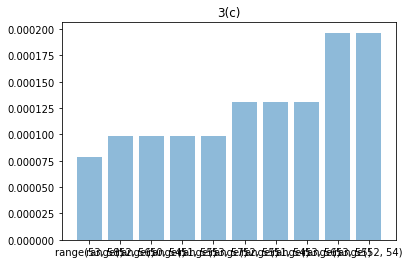

In [118]:
#3(c)
y3=posterior(x3,all_h_withrange)
index=list(np.argsort(y3)[-10:])
#corresponding hypothesis
max_hypothesis_forx3=[all_h_withrange[i] for i in index]
#max 10 values to plot
max_10_y3=[y3[i] for i in index]
#top 10 hypothesis
max_hypothesis_forx3
plt.bar(range(10), max_10_y3,align='center', alpha=0.5)
plt.xticks(range(10),max_hypothesis_forx3)
plt.title('3(c)')
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

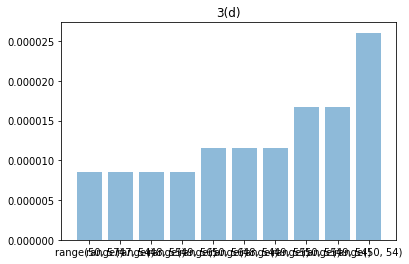

In [119]:
#3(d)
y4=posterior(x4,all_h_withrange)
index=list(np.argsort(y4)[-10:])
#corresponding hypothesis
max_hypothesis_forx4=[all_h_withrange[i] for i in index]
#max 10 values to plot
max_10_y4=[y4[i] for i in index]
#top 10 hypothesis
max_hypothesis_forx4
plt.bar(range(10), max_10_y4,align='center', alpha=0.5)
plt.xticks(range(10),max_hypothesis_forx4)
plt.title('3(d)')
plt.show



<function matplotlib.pyplot.show(*args, **kw)>

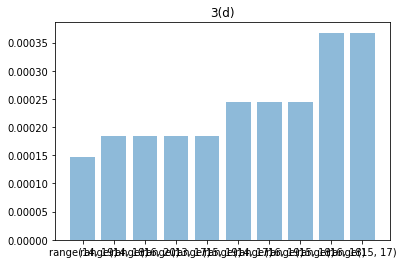

In [120]:
#3(e)
y5=posterior(x5,all_h_withrange)
index=list(np.argsort(y5)[-10:])
#corresponding hypothesis
max_hypothesis_forx5=[all_h_withrange[i] for i in index]
#max 10 values to plot
max_10_y5=[y5[i] for i in index]
#top 10 hypothesis
max_hypothesis_forx5
plt.bar(range(10), max_10_y5,align='center', alpha=0.5)
plt.xticks(range(10),max_hypothesis_forx5)
plt.title('3(d)')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

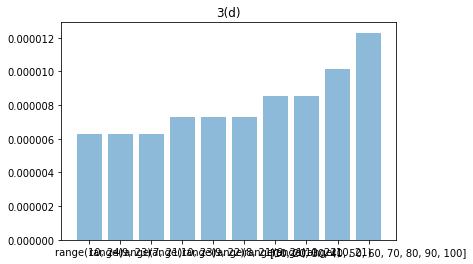

In [121]:
#3(f)
y6=posterior(x6,all_h_withrange)
index=list(np.argsort(y6)[-10:])
#corresponding hypothesis
max_hypothesis_forx6=[all_h_withrange[i] for i in index]
#max 10 values to plot
max_10_y6=[y6[i] for i in index]
#top 10 hypothesis
max_hypothesis_forx6
plt.bar(range(10), max_10_y6,align='center', alpha=0.5)
plt.xticks(range(10),max_hypothesis_forx6)
plt.title('3(d)')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

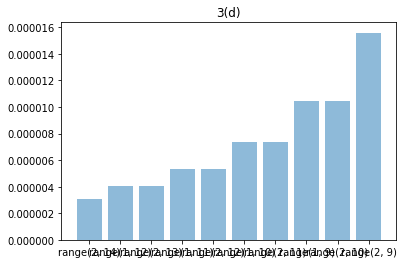

In [122]:
#3(g)
y7=posterior(x7,all_h_withrange)
index=list(np.argsort(y7)[-10:])
#corresponding hypothesis
max_hypothesis_forx7=[all_h_withrange[i] for i in index]
#max 10 values to plot
max_10_y7=[y7[i] for i in index]
#top 10 hypothesis
max_hypothesis_forx7
plt.bar(range(10), max_10_y7,align='center', alpha=0.5)
plt.xticks(range(10),max_hypothesis_forx7)
plt.title('3(d)')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

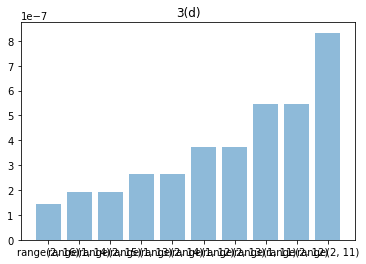

In [123]:
#3(h)
y8=posterior(x8,all_h_withrange)
index=list(np.argsort(y8)[-10:])
#corresponding hypothesis
max_hypothesis_forx8=[all_h_withrange[i] for i in index]
#max 10 values to plot
max_10_y8=[y8[i] for i in index]
#top 10 hypothesis
max_hypothesis_forx8
plt.bar(range(10), max_10_y8,align='center', alpha=0.5)
plt.xticks(range(10),max_hypothesis_forx8)
plt.title('3(d)')
plt.show